In [54]:
import os
from PIL import Image
import numpy as np

def createDataset(dataImages, dataLabels, srcDir, label1, gray=True, size=None):
    srcList = os.listdir(srcDir)
    for fname in srcList:
        filePath = os.path.join(srcDir, fname)

        img = Image.open(filePath)

        # 
        if size != None:
            imgRes = img.resize(size)
        else:
            imgRes = img
        
        if gray == True:
            imgGray = imgRes.convert('L')
            data1 = np.array(imgGray)
            data1 = np.rollaxis(data1, 0,2)
        else:
            data1 = np.array(imgRes)
            data1 = np.rollaxis(data1, 0,2)
        
        dataImages.append(data1)
        dataLabels.append(label1)
        

In [55]:
import os
from PIL import Image
import numpy as np

datasetFileName = "dataset_new.npz"

className = {"clean": 0, "contaminated": 1}

dataImages = [];
dataLabels = [];

size = (326, 244)

srcDir1 = "aidata/new_clean_t"
label1 = className["clean"]
createDataset(dataImages, dataLabels, srcDir1, label1, gray=False, size=size)

# srcDir2 = "aidata/new_contaminated_t"
# label2 = className["contaminated"]
# createDataset(dataImages, dataLabels, srcDir2, label2, gray=False, size=size)


np.savez_compressed(datasetFileName, images=dataImages, labels=dataLabels)


In [56]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.6.0


In [57]:
import matplotlib.pyplot as plt

def plot_image(i, predictionsArray, trueLabels, img):
  trueLabel, img = trueLabels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predictedLabel = np.argmax(predictionsArray)
  if predictedLabel == trueLabel:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predictedLabel],
                                100*np.max(predictionsArray),
                                classNames[trueLabel]),
                                color=color)

def plot_value_array(i, predictionsArray, trueLabels):
  trueLabel = trueLabels[i]
  plt.grid(False)
  plt.xticks(range(outputShape))
  plt.yticks([])
  thisplot = plt.bar(range(outputShape), predictionsArray, color="#777777")
  plt.ylim([0, 1])
  predictedLabel = np.argmax(predictionsArray)

  thisplot[predictedLabel].set_color('red')
  thisplot[trueLabel].set_color('blue')

In [58]:
import numpy as np

datasetFileName = "dataset_new.npz"
with np.load(datasetFileName) as data:
    dataImages = data['images']
    dataLabels = data['labels']

classNames = ['Clean', 'Contaminated']
outputShape = len(classNames)

print(dataImages.shape)

(12, 326, 244, 3)


In [59]:
import os
import tensorflow as tf


modelDir = 'tf_model'
version = "4_98"

# for SavedModel format
exportPath = os.path.join(modelDir, version)

# Recreate the exact same model, including its weights and the optimizer
loadedModel = tf.keras.models.load_model(exportPath)

# Show the model architecture
loadedModel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 238632)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               30545024  
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 30,545,282
Trainable params: 30,545,282
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Evaluate the restored model
loss, acc = loadedModel.evaluate(dataImages, dataLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


1/1 - 0s - loss: 1700.3597 - accuracy: 0.2500
Restored model, accuracy: 25.00%


In [61]:

probabilityModel = tf.keras.Sequential([loadedModel, tf.keras.layers.Softmax()])

predictions = probabilityModel.predict(dataImages)

print(predictions.shape)

high = dataLabels.shape[0]
numRows = 4
numCols = 3
numImages = numRows*numCols

selectedIndex = np.random.randint(0, high, size=numImages)
selectedIndex = np.arange(0,numImages)

testPredictions = predictions[selectedIndex]
testImages = dataImages[selectedIndex]
testLabels = dataLabels[selectedIndex]

# for i,p in enumerate(testPredictions):
#     print("prediction: ", np.argmax(p), "actual: ", testLabels[i])


(12, 2)


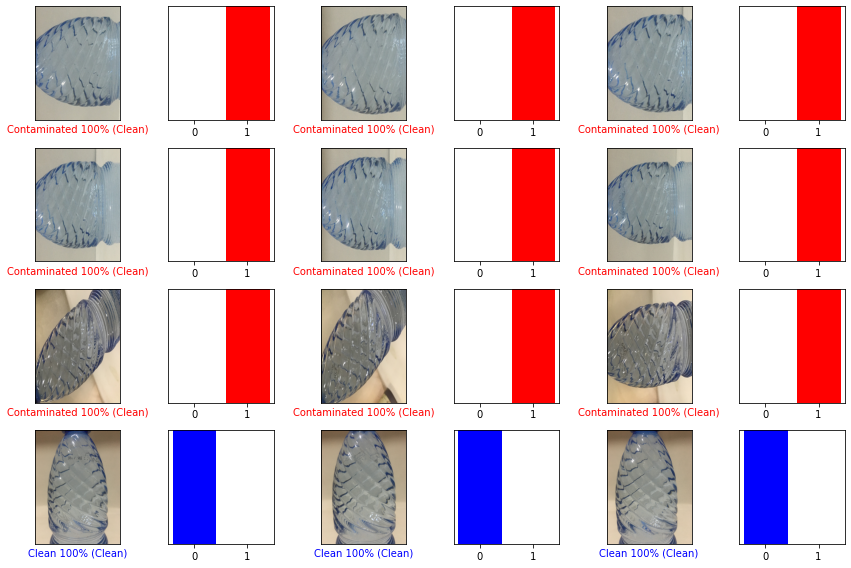

In [62]:
import matplotlib.pyplot as plt

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(numImages):
    plt.subplot(numRows, 2*numCols, 2*i+1)
    plot_image(i, testPredictions[i], testLabels, testImages)
    plt.subplot(numRows, 2*numCols, 2*i+2)
    plot_value_array(i, testPredictions[i], testLabels)
plt.tight_layout()
plt.show()